<a href="https://colab.research.google.com/github/BhavikDudhrejiya/Data_Science/blob/main/Feature_Selection_Based_on_Univariate_mse_on_regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries for data manipulation
import pandas as pd
import numpy as np

#Importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Importing library for train and test split
from sklearn.model_selection import train_test_split

#Importing library for classification
from sklearn.ensemble import RandomForestRegressor

#Importing library for accuracy
from sklearn.metrics import accuracy_score, roc_auc_score

#Importing library for loading data
from sklearn.datasets import load_boston

#Importing libraries for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#Loading data
data = load_boston()

#Checking data attributes
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
#Splitting data into X & y
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target

#Checking the shape of the data
X.shape, y.shape

((506, 13), (506,))

In [8]:
#Splitting data into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Checking shape of the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [12]:
#Extracting mean square error on each features
mse = []
for feature in X_train.columns:
  clf = RandomForestRegressor()
  clf.fit(X_train[feature].to_frame(), y_train)
  y_pred = clf.predict(X_test[feature].to_frame())
  mse.append(mean_squared_error(y_test, y_pred))

In [13]:
#Checking result
mse

[85.61324219117644,
 49.32089575416089,
 38.053192640601566,
 74.68136739207905,
 30.015973919326242,
 50.676037688376915,
 79.26646007249809,
 90.0011043598222,
 68.37652848086566,
 62.27821721560975,
 55.455796285846795,
 84.5445847349111,
 30.05339705264016]

In [15]:
#Converting result into dataframe
mse_df = pd.DataFrame()
mse_df['feature'] = X_train.columns
mse_df['mse'] = mse
mse_df.reset_index(drop=True, inplace = True)
mse_df.sort_values(by='mse', ascending = False, inplace = True)
mse_df

,feature,mse
7,DIS,90.001104
0,CRIM,85.613242
11,B,84.544585
6,AGE,79.266460
3,CHAS,74.681367
8,RAD,68.376528
9,TAX,62.278217
10,PTRATIO,55.455796
5,RM,50.676038
1,ZN,49.320896


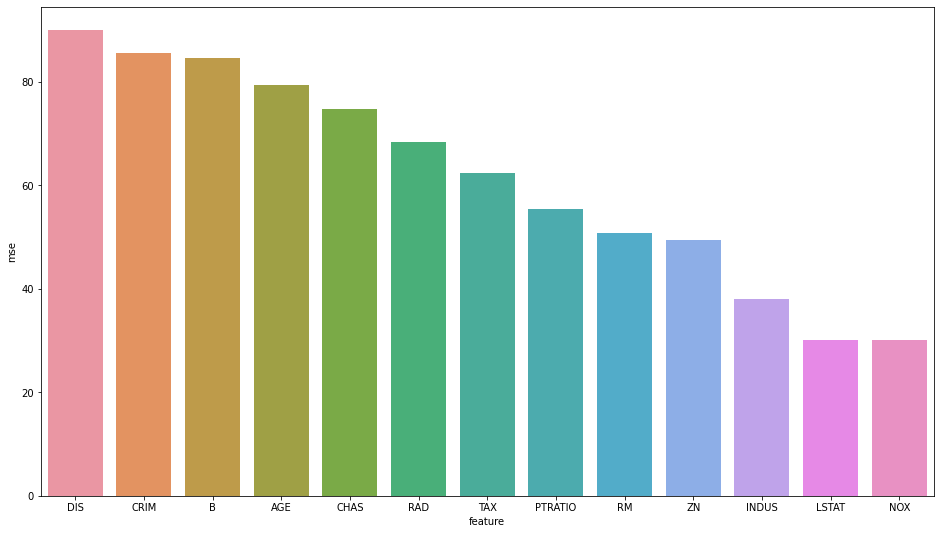

In [16]:
#Visualizing the mse
plt.figure(figsize = (16,9))
sns.barplot(x = mse_df['feature'], y = mse_df['mse']);

In [17]:
#Creating data have lower mse
X_train_mse = X_train[['LSTAT', 'NOX']]
X_test_mse = X_test[['LSTAT', 'NOX']]

In [19]:
#Creating function who train a model and extract accuracy
def regressor(X_train, X_test, y_train, y_test):
  rf = RandomForestRegressor()
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print('R2',r2, 'RMSE',rmse)

In [22]:
%%time
#Train a model and extract accuracy on data have minimum mse 
regressor(X_train_mse, X_test_mse, y_train, y_test)

R2 0.7088407500095554 RMSE 4.620801803142127
CPU times: user 209 ms, sys: 2.63 ms, total: 212 ms
Wall time: 213 ms


In [21]:
%%time
#Train a model and extract accuracy on original data
regressor(X_train, X_test, y_train, y_test)

R2 0.8778661898110409 RMSE 2.9927469577198087
CPU times: user 393 ms, sys: 666 µs, total: 394 ms
Wall time: 398 ms
